## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\aswan\AppData\Local\Temp\ipykernel_4228\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 17s 8s/step - loss: 5.7566 - accuracy: 0.3281 - val_loss: 10.2562 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 8s 6s/step - loss: 8.5741 - accuracy: 0.2969 - val_loss: 2.1840 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 9s 6s/step - loss: 2.9311 - accuracy: 0.3750 - val_loss: 7.5615 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 8s 6s/step - loss: 4.7132 - accuracy: 0.4531 - val_loss: 7.7960 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 8s 6s/step - loss: 4.5118 - accuracy: 0.4062 - val_loss: 2.1330 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 8s 6s/step - loss: 1.0932 - accuracy: 0.6250 - val_loss: 2.3398 - val_accuracy: 0.5862
Epoch 7/50
2/2 [==============================] - 9s 6s/step - loss: 3.1768 - accuracy: 0.4844 - val_loss: 2.0859 - val_accuracy: 0.4828
Epoch 8/50
2/2 [=======================

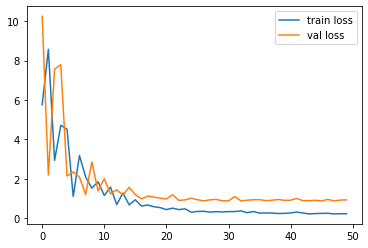

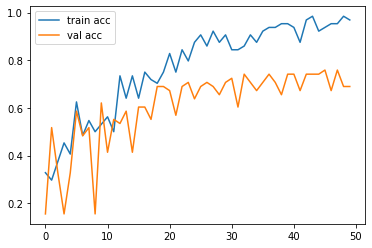

<Figure size 432x288 with 0 Axes>

In [43]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [44]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [45]:

y_pred = model.predict(test_set)


2/2 [==============================] - 5s 2s/step


In [46]:
y_pred

array([[2.30962522e-02, 9.23242390e-01, 5.36614358e-02],
       [3.17462862e-01, 2.97100186e-01, 3.85436982e-01],
       [1.60754472e-01, 5.14452338e-01, 3.24793220e-01],
       [2.02230945e-01, 3.59429777e-01, 4.38339293e-01],
       [7.96381384e-02, 3.09049338e-01, 6.11312568e-01],
       [9.65441048e-01, 1.39595447e-02, 2.05994733e-02],
       [1.93147175e-02, 1.77795999e-03, 9.78907287e-01],
       [5.14403079e-03, 2.47006081e-02, 9.70155299e-01],
       [2.41014604e-02, 1.86625212e-01, 7.89273381e-01],
       [3.22392490e-03, 9.75478768e-01, 2.12973841e-02],
       [8.22172999e-01, 1.66014865e-01, 1.18121440e-02],
       [2.76593491e-02, 8.78403544e-01, 9.39371809e-02],
       [4.72150350e-06, 9.68972512e-04, 9.99026299e-01],
       [2.32161731e-01, 3.95563811e-01, 3.72274429e-01],
       [3.59527878e-02, 2.29190584e-04, 9.63817954e-01],
       [3.47807854e-01, 2.94986248e-01, 3.57205957e-01],
       [3.11170816e-02, 4.27113742e-01, 5.41769147e-01],
       [8.93484533e-01, 4.00333

In [47]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [48]:
y_pred

array([1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1,
       2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1], dtype=int64)

In [49]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [50]:
model=load_model('model_resnet50.h5')

In [51]:
img_data

array([[[[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.264496, -116.04567 , -122.91137 ],
         [-103.18214 , -115.96331 , -122.82902 ],
         [-103.08018 , -115.86135 , -122.72706 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.00959 , -115.818214, -122.719215],
         [-103.01743 , -115.82606 , -122.72706 ],
         [-103.021355, -115.82998 , -122.73098 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-102.96645 , -115.80253 , -122.73882 ],
         [-102.95861 , -115.794685, -122.73098 ],
         [-102.95861 , -115.794685, -122.73098 ]],

        ...,

        [[-103.04096 , -115.96723 , -1

In [52]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [53]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [54]:
x.shape

(224, 224, 3)

In [55]:
x=x/255

In [56]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [57]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[1.0147017e-03, 7.3607930e-04, 9.9824929e-01]], dtype=float32)

In [58]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 195ms/step


In [59]:
a==1

array([False])

In [60]:
a

array([2], dtype=int64)